In [1]:
from src.tensor import Tensor
import src.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from mnist import MNIST
np.set_printoptions(suppress=True)

In [2]:
mndata = MNIST('./mnist_dataset/')
mndata.gz = True
training, test = mndata.load_training(), mndata.load_testing()

In [3]:
X = np.array(training[0] + test[0], dtype=float)
Y = np.array(list(training[1]) + list(test[1]), dtype=int)

# Scale down pixels from 0-255 to 0-1
X = X / 255.0

# OneHot label vectors
one_hot = np.zeros((Y.size, 10)) # (70000, 10)
one_hot[np.arange(Y.size), Y] = 1
Y = one_hot

In [4]:
# Split
n = len(X)
tr, d = int(n*0.8), int(n*0.9)
Xtr, Xdev, Xte = Tensor(X[:tr]), Tensor(X[tr:d]), Tensor(X[d:])
Ytr, Ydev, Yte = Tensor(Y[:tr]), Tensor(Y[tr:d]), Tensor(Y[d:])
print(f'Sizes: train={len(Xtr)}, val={len(Xdev)}, test={len(Xte)}')

Sizes: train=56000, val=7000, test=7000


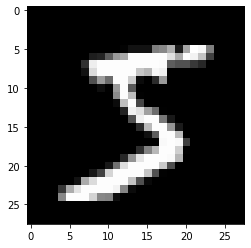

In [5]:
# Visualize X
img = np.array(Xtr[0].tolist())
plt.imshow(img.reshape(28, 28),cmap='gray')
plt.show()

In [6]:
# Multinomial sampling with replacement
rng = np.random.default_rng(seed=1)
def draw_batch(batch_size): 
    draw = lambda: int(rng.random() * len(Xtr))
    batch = [draw() for _ in range(batch_size)]
    return Xtr[batch], Ytr[batch]

In [7]:
mlp = nn.Sequential((
    nn.Linear(784, 512),
    nn.Tanh(),
    nn.Linear(512, 256),
    nn.Tanh(),
    nn.Linear(256, 10, bias=False),
    nn.Softmax()
))
mlp[0].W = mlp[0].W * 0.11
mlp[2].W = mlp[2].W * 0.07
losses = []

std=1.0633167276322384
std=1.021437095791861
std=9.078233794118741
Epoch 0: 13.720013220377844
Epoch 1: 16.035943812019042
Epoch 2: 24.70945382437895
Epoch 3: 12.518665374403072
Epoch 4: 12.778913762288465
Epoch 5: 9.189120519478976
Epoch 6: 4.372017156712092
Epoch 7: 5.395378028409413
Epoch 8: 5.38730105675053
Epoch 9: 6.972585640240091
Epoch 10: 5.359962812399077
Epoch 11: 4.121283833686325
Epoch 12: 3.7919123928310317
Epoch 13: 4.19800236328065
Epoch 14: 5.33272211894351
Epoch 15: 2.4145406378976015
Epoch 16: 5.024775234341157
Epoch 17: 2.8872639526972237
Epoch 18: 3.5419748334040335
Epoch 19: 3.5160175836540732
Epoch 20: 1.0186676834851185
Epoch 21: 1.4245964418863277
Epoch 22: 3.031420632171516
Epoch 23: 0.9936532200586037
Epoch 24: 0.9038806750061531
Epoch 25: 2.286259297854494
Epoch 26: 3.518363753743088
Epoch 27: 0.9231773210241031
Epoch 28: 3.934384528027868
Epoch 29: 3.435468066340227
Epoch 30: 3.250575059085606
Epoch 31: 2.14852095878988
Epoch 32: 2.8387740702450515
Epoch 33

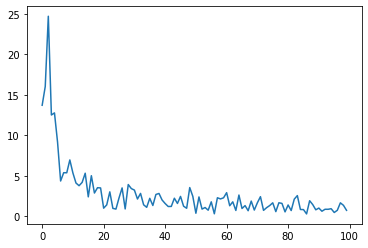

In [8]:
epochs = 100
batch_size = 32
lr = 0.01
breakpoint = -1
for e in range(epochs):
    x, y = draw_batch(batch_size)
    out = mlp(x, breakpoint=breakpoint, printstddev=(e==0))

    loss = nn.nlll(out, y, reduction='mean')
    loss.backward()
    mlp.optimize(lr=lr)
    mlp.zero_grad()

    losses.append(loss.data.item())
    print(f'Epoch {e}: {loss.data.item()}')

plt.plot(losses)
plt.show()

In [13]:
def accuracy(split):
    x, y = {'train': (Xtr, Ytr), 'dev': (Xdev, Ydev), 'test': (Xte, Yte)}[split]
    x = mlp(x) # (7000, 10)
    correct = (x.data.argmax(1) == y.data.argmax(1)).sum()
    acc = (correct / len(x)) * 100
    print(f'{split}-accuracy: {acc:.2f}%')

accuracy('test')
accuracy('train')
accuracy('dev')

test-accuracy: 87.69%
train-accuracy: 85.01%
dev-accuracy: 85.14%
